In [1]:
#Importamos las librerias
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as datetime
from shapely.geometry import Point
from matplotlib.colors import ListedColormap

%matplotlib inline
plt.style.use('default')
sns.set(style="whitegrid")

In [2]:
#Cargamos el csv
propiedades=pd.read_csv('train.csv')

In [3]:
#Cargamos el .shp de México
url="../Mapas/Mexico/MexicoPoly02.shp"
mex=gpd.read_file(url)

In [4]:
#Cargamos el .shp de los municipios de México
url_municipio="../Mapas/Municipios/Muni_2012gw.shp"
mex_municipio=gpd.read_file(url_municipio)

In [5]:
#Establecemos las longitudes extremas de México
lat_maxima=32.718333
lat_minima=14.540833
lng_maxima=-86.710000
lng_minima=-118.366666

In [6]:
propiedades.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [7]:
propiedades.columns

Index([u'id', u'titulo', u'descripcion', u'tipodepropiedad', u'direccion',
       u'ciudad', u'provincia', u'antiguedad', u'habitaciones', u'garages',
       u'banos', u'metroscubiertos', u'metrostotales', u'idzona', u'lat',
       u'lng', u'fecha', u'gimnasio', u'usosmultiples', u'piscina',
       u'escuelascercanas', u'centroscomercialescercanos', u'precio'],
      dtype='object')

In [8]:
preciom2=propiedades.loc[:,['ciudad','provincia','metrostotales','metroscubiertos','precio','fecha']]
preciom2.head()

,ciudad,provincia,metrostotales,metroscubiertos,precio,fecha
0,Benito Juárez,Distrito Federal,80.0,80.0,2273000.0,2015-08-23 00:00:00
1,La Magdalena Contreras,Distrito Federal,180.0,268.0,3600000.0,2013-06-28 00:00:00
2,Tonalá,Jalisco,166.0,144.0,1200000.0,2015-10-17 00:00:00
3,Zinacantepec,Edo. de México,67.0,63.0,650000.0,2012-03-09 00:00:00
4,Zapopan,Jalisco,95.0,95.0,1150000.0,2016-06-07 00:00:00


In [9]:
preciom2['precio m2 construccion']=(preciom2['precio']/preciom2['metroscubiertos'])
preciom2['preciom2']=(preciom2['precio']/preciom2['metrostotales'])
preciom2.head()

,ciudad,provincia,metrostotales,metroscubiertos,precio,fecha,precio m2 construccion,preciom2
0,Benito Juárez,Distrito Federal,80.0,80.0,2273000.0,2015-08-23 00:00:00,28412.500000,28412.500000
1,La Magdalena Contreras,Distrito Federal,180.0,268.0,3600000.0,2013-06-28 00:00:00,13432.835821,20000.000000
2,Tonalá,Jalisco,166.0,144.0,1200000.0,2015-10-17 00:00:00,8333.333333,7228.915663
3,Zinacantepec,Edo. de México,67.0,63.0,650000.0,2012-03-09 00:00:00,10317.460317,9701.492537
4,Zapopan,Jalisco,95.0,95.0,1150000.0,2016-06-07 00:00:00,12105.263158,12105.263158


In [10]:
#tomando la cotizacion dolar hoy a 1USD = 19.40 pesos mexicanos
cotizacion = 19.4
preciom2['precio m2 dolares'] = (preciom2['preciom2']/cotizacion)
preciom2['precio m2 construccion dolares'] = (preciom2['precio m2 construccion']/cotizacion)
preciom2.head()

,ciudad,provincia,metrostotales,metroscubiertos,precio,fecha,precio m2 construccion,preciom2,precio m2 dolares,precio m2 construccion dolares
0,Benito Juárez,Distrito Federal,80.0,80.0,2273000.0,2015-08-23 00:00:00,28412.500000,28412.500000,1464.561856,1464.561856
1,La Magdalena Contreras,Distrito Federal,180.0,268.0,3600000.0,2013-06-28 00:00:00,13432.835821,20000.000000,1030.927835,692.414218
2,Tonalá,Jalisco,166.0,144.0,1200000.0,2015-10-17 00:00:00,8333.333333,7228.915663,372.624519,429.553265
3,Zinacantepec,Edo. de México,67.0,63.0,650000.0,2012-03-09 00:00:00,10317.460317,9701.492537,500.076935,531.827851
4,Zapopan,Jalisco,95.0,95.0,1150000.0,2016-06-07 00:00:00,12105.263158,12105.263158,623.982637,623.982637


In [11]:
preciom2.describe()

,metrostotales,metroscubiertos,precio,precio m2 construccion,preciom2,precio m2 dolares,precio m2 construccion dolares
count,188533.000000,222600.000000,2.400000e+05,222600.000000,188533.000000,188533.000000,222600.000000
mean,176.765145,174.016774,2.530838e+06,14695.572399,14055.691813,724.520197,757.503732
std,94.427328,98.152950,2.152552e+06,11279.392000,11946.477871,615.797828,581.411959
min,15.000000,15.000000,3.100000e+05,781.650485,720.000000,37.113402,40.291262
25%,102.000000,90.000000,9.527725e+05,8333.333333,7250.000000,373.711340,429.553265
50%,155.000000,153.000000,1.850000e+06,11600.000000,11267.605634,580.804414,597.938144
75%,238.000000,240.000000,3.390000e+06,17326.248386,17355.371901,894.606799,893.105587
max,439.000000,439.000000,1.252500e+07,583333.333333,733333.333333,37800.687285,30068.728522


In [12]:
preciom2.size

2400000

In [13]:
preciom2.dropna(inplace = True)
preciom2.size

1709090

In [69]:
#cuidades/provincias con valor m2 mas caro
precio_ciudades = preciom2.groupby(['ciudad']).agg({'precio m2 dolares':[np.mean, np.size]})
precio_ciudades=precio_ciudades[precio_ciudades[('precio m2 dolares', 'size')] >= 100]
top10_m2_ciudad=precio_ciudades[[('precio m2 dolares', 'mean')]].sort_values(('precio m2 dolares', 'mean'), ascending = False)[:10]

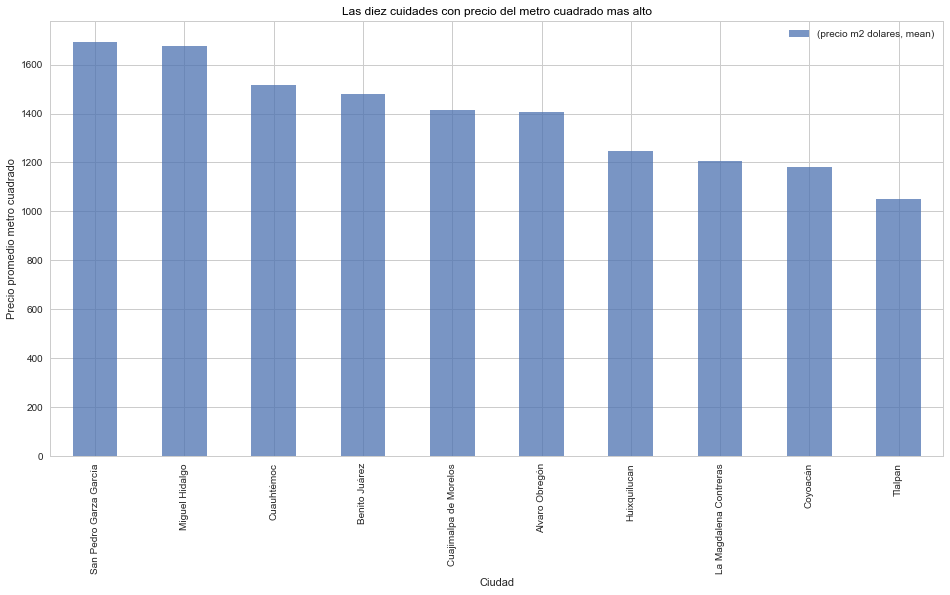

In [70]:
f = plt.figure()

plt.title('Las diez cuidades con precio del metro cuadrado mas alto', color = 'black')

ax = top10_m2_ciudad.reset_index().plot(kind='bar', x = 'ciudad', stacked=True, figsize=(16,8) ,alpha=0.75,\
                                 ax=f.gca())
handles, labels = ax.get_legend_handles_labels()

plt.legend(handles[::-1], labels[::-1], loc='upper right')

ax.set_ylabel('Precio promedio metro cuadrado')
ax.set_xlabel('Ciudad')
plt.show()

In [71]:
precio_provincias=preciom2.groupby(['provincia']).agg({'precio m2 dolares':[np.mean, np.size]})
precio_provincias=precio_provincias[precio_provincias[('precio m2 dolares', 'size')] >= 100]
top10_m2_provincia=precio_provincias[[('precio m2 dolares', 'mean')]].sort_values(('precio m2 dolares', 'mean'), ascending = False)[:10]

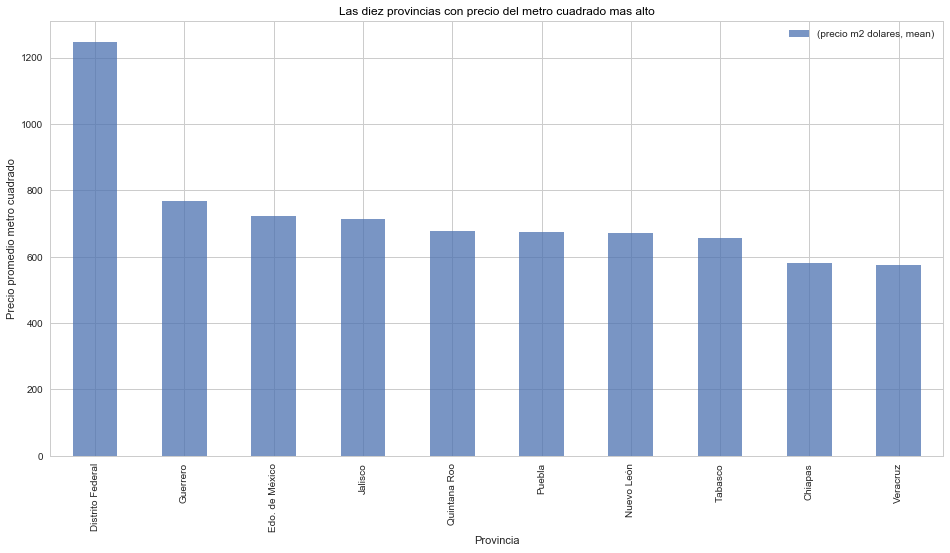

In [72]:
f = plt.figure()

plt.title('Las diez provincias con precio del metro cuadrado mas alto', color = 'black')

ax = top10_m2_provincia.reset_index().plot(kind='bar', x = 'provincia', stacked=True, figsize=(16,8) ,alpha=0.75,\
                                 ax=f.gca())
handles, labels = ax.get_legend_handles_labels()

plt.legend(handles[::-1], labels[::-1], loc='upper right')

ax.set_ylabel('Precio promedio metro cuadrado')
ax.set_xlabel('Provincia')
plt.show()


In [17]:
preciom2['Fecha']=pd.to_datetime(preciom2['fecha'])
preciom2.drop(columns={'fecha'},inplace=True)
preciom2['Anio']=preciom2['Fecha'].dt.year
preciom2['Mes']=preciom2['Fecha'].dt.month
preciom2['Dia']=preciom2['Fecha'].dt.day
preciom2.head()

,ciudad,provincia,metrostotales,metroscubiertos,precio,precio m2 construccion,preciom2,precio m2 dolares,precio m2 construccion dolares,Fecha,Anio,Mes,Dia
0,Benito Juárez,Distrito Federal,80.0,80.0,2273000.0,28412.500000,28412.500000,1464.561856,1464.561856,2015-08-23,2015,8,23
1,La Magdalena Contreras,Distrito Federal,180.0,268.0,3600000.0,13432.835821,20000.000000,1030.927835,692.414218,2013-06-28,2013,6,28
2,Tonalá,Jalisco,166.0,144.0,1200000.0,8333.333333,7228.915663,372.624519,429.553265,2015-10-17,2015,10,17
3,Zinacantepec,Edo. de México,67.0,63.0,650000.0,10317.460317,9701.492537,500.076935,531.827851,2012-03-09,2012,3,9
4,Zapopan,Jalisco,95.0,95.0,1150000.0,12105.263158,12105.263158,623.982637,623.982637,2016-06-07,2016,6,7


In [18]:
preciom2_anio=preciom2.groupby('Anio').agg({'precio m2 construccion dolares':[np.mean,np.size],'precio m2 dolares':[np.mean,np.size]})
preciom2_anio

precio m2 construccion dolares          precio m2 dolares         
                               mean     size              mean     size
Anio                                                                   
2012                     511.835829  14582.0        565.168771  14582.0
2013                     538.815872  19960.0        580.249566  19960.0
2014                     645.532453  28711.0        679.307049  28711.0
2015                     724.992753  38143.0        757.577451  38143.0
2016                     777.172841  69513.0        817.006934  69513.0

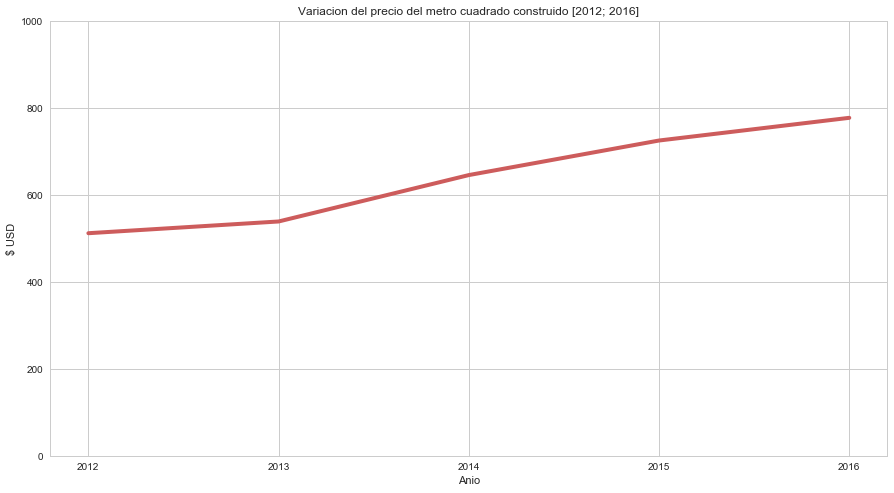

In [23]:
#m2 construido
l = [2012, 2013, 2014, 2015, 2016]
ax = preciom2_anio.plot(kind='line', y = ('precio m2 construccion dolares', 'mean'), figsize=(15,8),\
             title = "Variacion del precio del metro cuadrado construido [2012; 2016]",\
             xticks=l, legend = False, color = 'indianred', lw = 4)
ax.set_ylabel('$ USD')
ax.set_xlabel('Anio')
ax.set_ylim([0,1000])

plt.show()

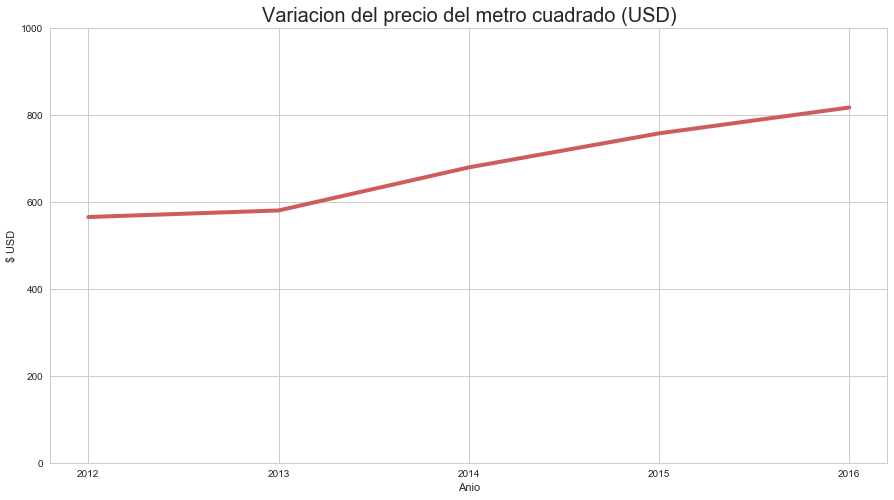

In [76]:
#m2
l = [2012, 2013, 2014, 2015, 2016]
ax = preciom2_anio.plot(kind='line', y = ('precio m2 dolares', 'mean'), figsize=(15,8),\
             title = "Variacion del precio del metro cuadrado (USD)",\
             xticks=l, legend = False, color = 'indianred', lw = 4)
ax.set_ylabel('$ USD')
ax.set_xlabel('Anio')
ax.set_ylim([0,1000])
ax.set_title("Variacion del precio del metro cuadrado (USD)",fontsize=20)

plt.show()

In [46]:
#variacion anio por anio a ver si se ve algo interesante....
preciom2_2012=preciom2[preciom2['Anio']==2012]
preciom2_2013=preciom2[preciom2['Anio']==2013]
preciom2_2014=preciom2[preciom2['Anio']==2014]
preciom2_2015=preciom2[preciom2['Anio']==2015]
preciom2_2016=preciom2[preciom2['Anio']==2016]


In [47]:
preciom2_2012 = preciom2_2012.groupby('Mes').agg({'precio m2 dolares':[np.mean, np.size]})
preciom2_2012

precio m2 dolares        
                 mean    size
Mes                          
1          529.137697   964.0
2          517.325043   850.0
3          583.095258   687.0
4          570.748529   920.0
5          538.420503  1231.0
6          564.472623   959.0
7          541.283709  1240.0
8          571.348959  2360.0
9          571.263785  1636.0
10         635.054014  1928.0
11         539.785500   937.0
12         548.678125   870.0

In [48]:
preciom2_2013 = preciom2_2013.groupby('Mes').agg({'precio m2 dolares':[np.mean, np.size]})
preciom2_2013

precio m2 dolares        
                 mean    size
Mes                          
1          537.751639  1272.0
2          611.795050   870.0
3          538.046221  1075.0
4          608.239468  1182.0
5          575.366672  1352.0
6          586.903755  1299.0
7          619.025077  1637.0
8          647.310110  1637.0
9          559.457814  2257.0
10         572.894124  2637.0
11         562.787039  2641.0
12         568.847093  2101.0

In [49]:
preciom2_2014 = preciom2_2014.groupby('Mes').agg({'precio m2 dolares':[np.mean, np.size]})
preciom2_2014

precio m2 dolares        
                 mean    size
Mes                          
1          652.277439  1580.0
2          643.640344  1727.0
3          622.090719  1993.0
4          663.735531  1948.0
5          656.608904  2180.0
6          683.703318  2165.0
7          672.109091  2260.0
8          694.790755  2548.0
9          692.946541  2815.0
10         679.247262  2732.0
11         690.480696  3446.0
12         736.199228  3317.0

In [50]:
preciom2_2015 = preciom2_2015.groupby('Mes').agg({'precio m2 dolares':[np.mean, np.size]})
preciom2_2015

precio m2 dolares        
                 mean    size
Mes                          
1          709.059168  3220.0
2          714.939694  2857.0
3          742.216901  2936.0
4          730.697979  2824.0
5          767.806160  2689.0
6          792.238000  2765.0
7          786.790752  2830.0
8          765.961323  3374.0
9          771.510974  3655.0
10         779.675193  4175.0
11         771.268898  3611.0
12         748.885206  3207.0

In [51]:
preciom2_2016 = preciom2_2016.groupby('Mes').agg({'precio m2 dolares':[np.mean, np.size]})
preciom2_2016

precio m2 dolares         
                 mean     size
Mes                           
1          752.482426   4201.0
2          761.161264   3350.0
3          805.528122   3687.0
4          774.302387   4656.0
5          791.991543   3936.0
6          771.790935   5089.0
7          805.611436   4495.0
8          827.230282   4733.0
9          828.589997   4336.0
10         842.164151   5082.0
11         838.023220   4597.0
12         852.416078  21351.0

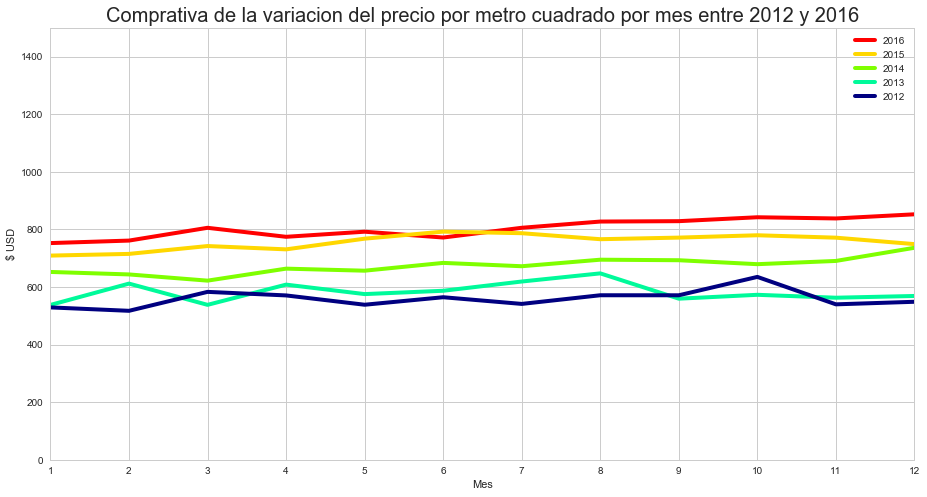

In [77]:
fig = plt.figure(figsize=(12, 6));

ax = fig.add_axes([0,0,1,1]);

preciom2_2016['precio m2 dolares', 'mean'].plot.line(c='red', label="2016", xticks = [i for i in xrange(1, 13)], lw = 4);
preciom2_2015['precio m2 dolares', 'mean'].plot.line(c='gold', label="2015", lw = 4);
preciom2_2014['precio m2 dolares', 'mean'].plot.line(c='chartreuse', label="2014", lw = 4);
preciom2_2013['precio m2 dolares', 'mean'].plot.line(c='mediumspringgreen', label="2013", lw = 4);
preciom2_2012['precio m2 dolares', 'mean'].plot.line(c='navy', label="2012", lw = 4);

plt.title("Comprativa de la variacion del precio por metro cuadrado por mes entre 2012 y 2016", fontsize=20)
ax.set_ylim([0,1500])
ax.set_xlim([1, 12])
ax.set_ylabel('$ USD')
ax.set_xlabel('Mes')

ax.legend();